In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [2]:
%matplotlib inline

# 1. Traitements préliminaires et sélection des indicateurs / données

## 1.1. Importation de la base de données

Pour débuter, nous importons la base de données complète. Le site source contient des informations sur l'encodage de cette dernière.

In [3]:
FoodData = pd.read_csv("data/fr.openfoodfacts.org.products.csv", sep='\t', encoding = 'utf-8', low_memory=False)

In [4]:
FoodData.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-fr.openfoodfacts.org/produit/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000003429145,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1630484064,2021-09-01T08:14:24Z,L.casei,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000017,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000031,http://world-fr.openfoodfacts.org/produit/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000003327986,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2. Filtrage des données alimentaires relatives à la France

Notre application n'étant destinée qu'à un public en France, nous filtrons sur les données contenant `france` comme tag.

In [5]:
FoodData = FoodData.loc[FoodData.loc[:,'countries_tags'].str.contains('france', na=False),:]

In [6]:
FoodData.reset_index(inplace = True, drop = True)

In [7]:
FoodData.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-fr.openfoodfacts.org/produit/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-fr.openfoodfacts.org/produit/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-fr.openfoodfacts.org/produit/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000123,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
FoodData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874943 entries, 0 to 874942
Columns: 191 entries, code to carnitine_100g
dtypes: float64(124), int64(2), object(65)
memory usage: 1.2+ GB


## 1.3. Exploration préliminaire

### 1.3.1. Complétion des données manquantes sur la base d'autres éléments

Une lecture du data dictionary indique que certaines données peuvent se trouver sous plusieurs noms. C'est le cas de l'énergie alimentaire (sous 3 indicateurs possibles), de la vitamine A (2 indicateurs) et de la vitamine B9 (2 indicateurs). Afin de rationaliser l'analyse des données, nous allons condenser les informations contenues sur 3 colonnes au lieu de 7.

Nous procédons donc au calcul des données manquantes en kcal/100g sur la base des données kJ/100g, et supprimons cette deuxième colonne.

In [9]:
kj_to_kcal = 1/4.1868
kcal = "energy-kcal_100g"
kj = "energy-kj_100g"

FoodData.loc[((FoodData[kcal]==0)|(FoodData[kcal].isna()))&((FoodData[kj]!=0)&(FoodData[kj].notna())), kcal] = FoodData.loc[((FoodData[kcal]==0)|(FoodData[kcal].isna()))&((FoodData[kj]!=0)&(FoodData[kj].notna())), kj]*kj_to_kcal
FoodData.drop(columns = kj, inplace = True)

Par ailleurs, une comparaison des données contenues dans la colonne `energy_100g` et `energy-kcal_100g` donne la vision suivante.

In [10]:
FoodData.loc[:,['energy_100g','energy-kcal_100g']].describe().astype('int')

,energy_100g,energy-kcal_100g
count,677084,676853
mean,1277,276
std,99996,380
min,0,0
25%,464,111
50%,1095,262
75%,1674,400
max,82272828,261359


On peut remarquer que les quartiles de l'indicateur `energy_100g` sont un peu plus que 4 fois supérieurs à ceux de l'indicateur `energy-kcal_100g`, ce qui est cohérent avec le fait que le premier indicateur représente des données en kJ (1kcal = 4.1868 kJ). Nous allons donc continuer de compléter l'information contenue dans l'indicateur `energy-kcal_100g` à l'aide de `energy_100g`, en considérant que ce dernier contient des données en kJ.

In [11]:
kj = "energy_100g"

FoodData.loc[((FoodData[kcal]==0)|(FoodData[kcal].isna()))&((FoodData[kj]!=0)&(FoodData[kj].notna())), kcal] = FoodData.loc[((FoodData[kcal]==0)|(FoodData[kcal].isna()))&((FoodData[kj]!=0)&(FoodData[kj].notna())), kj]*kj_to_kcal
FoodData.drop(columns = kj, inplace = True)

### 1.3.2. Filtrage des données

Afin de sélectionner les indicateurs que nous utiliserons, nous allons procéder par filtres successifs.

La base de données étant de nature collaborative, nous allons créer un filtre basé sur la complétude des éléments saisis.

In [12]:
def entries_filter(data, na_threshold):
    
    '''
    Fonction filtrant les lignes en fonction du nombre de valeurs manquantes.
    
    Paramètres
    ----------
    data : données à filtrer, format DataFrame de dimension n*c.
    na_threshold : ratio maximal de valeurs manquantes au-delà duquel la ligne est supprimée.
    
    Résultat
    --------
    DataFrame de dimension (n-lignes rejetées)*c contenant l'ensemble des lignes passant le filtre.
    
    '''
    
    length = data.shape[1]
    
    entries_retained = data.dropna(axis = 0, thresh = (1-na_threshold) * length)
    entries_retained.reset_index(inplace = True, drop = True)
    
    return entries_retained

Un second filtre mis en place visera à identifier les indicateurs les plus complets.

In [13]:
def indicator_filter(data, na_threshold):
    
    '''
    Fonction filtrant la liste de colonnes (= les indicateurs) en fonction du nombre de valeurs manquantes.
    
    Paramètres
    ----------
    data : données à filtrer, format DataFrame, dont les noms de colonnes sont uniques.
    na_threshold : ratio maximal de valeurs manquantes au-delà duquel l'indicateur est rejeté.
    
    Résultat
    --------
    list contenant l'ensemble des indicateurs passant le filtre.
    
    '''
    
    length = data.shape[0]
    
    if data.columns.nunique() != len(data.columns):
        raise ValueError("La liste d'indicateurs (noms de colonnes) ne doit contenir que des valeurs uniques.")
        
    indicators_retained = data.dropna(axis = 1, thresh = (1-na_threshold) * length)
    
    indicators_retained = indicators_retained.columns.tolist()
    
    return indicators_retained

#### 1.3.2.1. Filtrage des indicateurs

In [14]:
na_threshold = []
nb_indicators = []

for i in np.arange(0.4,1.0,0.1):
    na_threshold.append(i)
    nb_indicators.append(len(indicator_filter(FoodData,i)))
    
filter_df = pd.DataFrame({
    "Ratio maximal de NaN": na_threshold,
    "Nombre d'indicateurs restants": nb_indicators
})

filter_df

,Ratio maximal de NaN,Nombre d'indicateurs restants
0,0.4,26
1,0.5,32
2,0.6,40
3,0.7,49
4,0.8,58
5,0.9,68


In [15]:
thresh = 0.7
nb_entries = filter_df.loc[filter_df["Ratio maximal de NaN"].round(2) == thresh, "Nombre d'indicateurs restants"].iloc[0]

display(Markdown(f"Nous retenons un maximum de {thresh:.0%} de valeurs manquantes en première approche."))
display(Markdown(f"Cette approche nous donne un total de {nb_entries:,.0f} indicateurs restants."))

Nous retenons un maximum de 70% de valeurs manquantes en première approche.

Cette approche nous donne un total de 49 indicateurs restants.

Les indicateurs restant sont les suivants.

In [16]:
indicator_filter(FoodData,thresh)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'quantity',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'labels',
 'labels_tags',
 'labels_fr',
 'countries',
 'countries_tags',
 'countries_fr',
 'nutriscore_score',
 'nutriscore_grade',
 'pnns_groups_1',
 'pnns_groups_2',
 'food_groups',
 'food_groups_tags',
 'food_groups_fr',
 'states',
 'states_tags',
 'states_fr',
 'ecoscore_score_fr',
 'ecoscore_grade_fr',
 'main_category',
 'main_category_fr',
 'image_url',
 'image_small_url',
 'image_ingredients_url',
 'image_ingredients_small_url',
 'image_nutrition_url',
 'image_nutrition_small_url',
 'energy-kcal_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g']

Nous procédons à une sélection manuelle en fonction du besoin de notre application. Par facilité, la liste est saisie dans un fichier .txt, qui est ensuite importé.

In [17]:
with open('data/kept_columns.txt') as tempfile:
    
    kept_columns = [i.replace('\n',"") for i in tempfile]

In [18]:
display(Markdown(f"Les indicateurs retenus sont les suivants :"))
for name in kept_columns:
    display(Markdown(f"- {name}"))

Les indicateurs retenus sont les suivants :

- code

- url

- last_modified_datetime

- image_small_url

- product_name

- quantity

- pnns_groups_1

- pnns_groups_2

- food_groups

- nutriscore_grade

- energy-kcal_100g

- fat_100g

- saturated-fat_100g

- carbohydrates_100g

- sugars_100g

- proteins_100g

- salt_100g

- sodium_100g

Ils correspondent aux informations suivantes:
- code barre unique du produit
- lien vers les informations contenues sur le site openfoodfacts
- date de dernière mise à jour des informations sur le produit
- url de l'image en basse résolution du produit
- nom du produit
- quantité de produit
- 3 indicateurs de classification du produit
- note nutriscore du produit
- énergie en kcal pour 100g
- gras, gras saturés, glucides, sucres, protéines, sel et sodium pour 100g

Nous filtrons ensuite la base pour ne conserver que ces colonnes.

In [19]:
FoodData = FoodData.loc[:,kept_columns]

#### 1.3.2.2. Filtrage des produits

In [20]:
na_threshold = []
nb_entries = []

for i in np.arange(0.1,0.5,0.05):
    na_threshold.append(i)
    nb_entries.append(entries_filter(FoodData,i).shape[0])
    
filter_df = pd.DataFrame({
    "Ratio maximal de NaN": na_threshold,
    "Nombre de lignes restantes": nb_entries
})

filter_df

,Ratio maximal de NaN,Nombre de lignes restantes
0,0.10,298076
1,0.15,364286
2,0.20,614569
3,0.25,645112
4,0.30,668821
5,0.35,673223
6,0.40,674711
7,0.45,679640


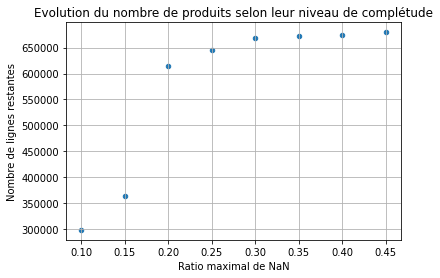

In [21]:
filter_df.plot(
    kind = 'scatter',
    x = "Ratio maximal de NaN", 
    y = "Nombre de lignes restantes", 
    title = "Evolution du nombre de produits selon leur niveau de complétude",
    grid = True
)

plt.savefig('figures/produits_nan.png', format = 'png', bbox_inches = 'tight')

plt.show()

In [22]:
thresh = 0.15
nb_entries = filter_df.loc[filter_df["Ratio maximal de NaN"].round(2) == thresh, "Nombre de lignes restantes"].iloc[0]

display(Markdown(f"Nous retenons un maximum de {thresh:.0%} de données manquantes par ligne en première approche."))
display(Markdown(f"Cette approche nous donne un total de {nb_entries:,.0f} lignes restantes."))

Nous retenons un maximum de 15% de données manquantes par ligne en première approche.

Cette approche nous donne un total de 364,286 lignes restantes.

In [23]:
FoodData = entries_filter(FoodData, thresh)

Un premier apreçu du nombre de données manquantes nous indique que certaines informations risquent de ne pas être toujours disponibles. Nous nous efforcerons de les compléter par la suite.

### 1.3.3. Formattage des données

In [24]:
FoodData.loc[:,"last_modified_datetime"] = pd.to_datetime(FoodData["last_modified_datetime"])

## 1.4. Finalisation et enregistrement de la base de données

In [25]:
FoodData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364286 entries, 0 to 364285
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   code                    364286 non-null  object             
 1   url                     364286 non-null  object             
 2   last_modified_datetime  364286 non-null  datetime64[ns, UTC]
 3   image_small_url         352291 non-null  object             
 4   product_name            363211 non-null  object             
 5   quantity                219502 non-null  object             
 6   pnns_groups_1           364286 non-null  object             
 7   pnns_groups_2           364286 non-null  object             
 8   food_groups             297058 non-null  object             
 9   nutriscore_grade        315100 non-null  object             
 10  energy-kcal_100g        364156 non-null  float64            
 11  fat_100g                36

In [26]:
FoodData.isna().sum()/FoodData.shape[0]

code                      0.000000
url                       0.000000
last_modified_datetime    0.000000
image_small_url           0.032927
product_name              0.002951
quantity                  0.397446
pnns_groups_1             0.000000
pnns_groups_2             0.000000
food_groups               0.184547
nutriscore_grade          0.135020
energy-kcal_100g          0.000357
fat_100g                  0.000206
saturated-fat_100g        0.000491
carbohydrates_100g        0.000299
sugars_100g               0.000373
proteins_100g             0.000170
salt_100g                 0.000055
sodium_100g               0.000055
dtype: float64

Nous enregistrons la base de donnée réduite pour faciliter son exploitation future.

In [27]:
FoodData.to_feather('data/FoodData_filtered.feather')